### Fashion MNIST with Tensorflow ###

This is a exercise to classify the Fashion MNIST images of clothing, such as sneakers, shirts, trousers using Convolutional Neural Networks. We will use tensorFlow v1.15 for this. 


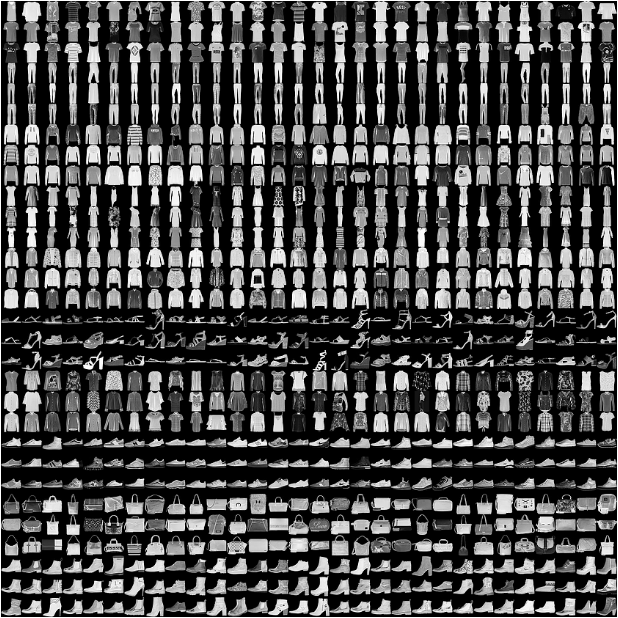




### About Fashion MNIST Dataset ###

1. Fashion MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 images and a test set of 10,000 images. 
2. Each example is a grayscale image, with a label from 10 classes. 
3. MNIST is considered as a Hello, World of machine learning problems and is considered as a simple problem. It is the most overused dataset and cannot represent modern CV-tasks. 
4. Fashion-MNIST is intended to serve as a replacement for benchmark machine learning algorithms, as it shares the same size (28 X 28) and the structure (60,000 training images and 10,000 testing images).

Fashion MNIST classes:



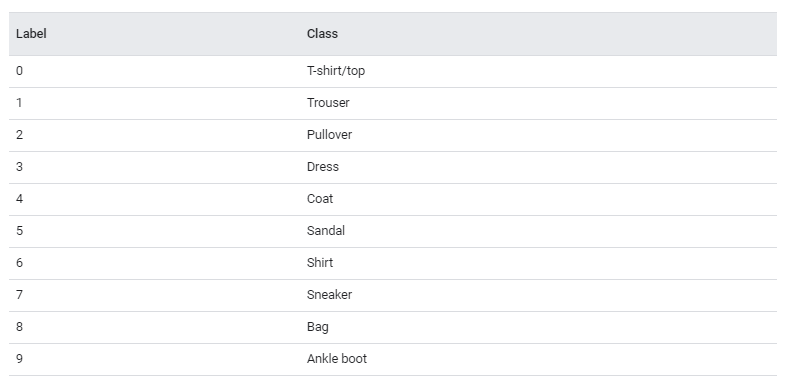


### Import the libraries ###

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [0]:
tf.__version__

### Load the dataset ###

Load the Fashion MNIST dataset using the Keras.dataset API

train_images and train_labels are arrays of training data - model uses to learn.

test_images and test_labels are arrays of testing data - unseen data to test performance of the model.

The first dimension in the train_images are the number of training examples. The next two dimensions are the size of the image which is 28 X 28.

Similarly, the train_labels are the scalar labels for the 60,000 training images.

In [0]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [0]:
print("Shape of training data: ", train_images.shape)
print("Shape of training labels: ", train_labels.shape)
print("Shape of testing data: ", test_images.shape)
print("Shape of testing labels: ", test_labels.shape)

### Visualize the dataset ###

Visualize the data from the dataset using matplotlib library. To visualize we reshape the image into a 28 X 28 grayscale image.

Note: A grayscale image is an image with single channel representing the intensity value. 

In [0]:
label_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot',
}

In [0]:
i=0

plt.figure()

# display images from the dataset
lbl = np.argmax(train_labels[i])
plt.imshow(train_images[i], cmap='gray')
plt.title("Label: "+ str(label_dict[lbl]))

### Examine the dataset ###

Basic check - There are no NANs in the input data

In [0]:
np.isnan(train_images).any()

### Data preprocessing ###

Inspect the image pixels before feeding them to the network. It is good practice to normalize the pixel values such that each pixel value has a value between 0 and 1. To do so, we normally divide the pixels simply by 255.

Please note that we need to perform the same operation to both the training and testing dataset.

**One hot encode the labels:** A one-hot encoding is the representation of categorical variables as binary variables. Each integer value is represented by a binary vector which is all zeros except for the index of the integer, which is marked with a 1. For example- label 7 is represented as [0, 0, 0, 0, 0, 0, 0, 1, 0, 0].


In [0]:
print(np.min(train_images[0]), "\t", np.max(train_images[0]))

In [0]:
# reshape the images to feed it to the network
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))
print(train_images[0].shape)

In [0]:
train_images = train_images/255.
test_images = test_images/255.
print(np.min(train_images[0]), "\t", np.max(train_images[0]))

In [0]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)
print(train_labels[0])

### Defining Hyperparameters ###

These are the non-trainable parameters in the system and are external to the system. They are important as they directly control the training algorithm and have an impact on the model being trained. Therefore, it is important to train our model with the right values of hyperparameters. 

**Learning rate:** Also referred to as the step size. This is one of the key hyperparameters to set in order to train a neural network. If the learning rate is too low, it may take a long time to converge or it may get stuck on a local plateau region. If the learning rate is set too high, the weight updates will be too large and the performance of the model will oscillate while training. 

**Training epochs:** Epoch is one cycle where the learner has seen the entire training dataset once. We initially set the training epochs to be quite high and decide to terminate our model based on the training. As long as the error keeps dropping on our validation dataset, we continue the training. If the validation error starts increasing, this could be because of overfitting. So we terminate our model training early to prevent our model from overfitting on the training data.

**Batch size:** The Batch size defines how many examples will be propogated from the network at once. For example, if you have 500 training examples and we choose a batch size of 100. The algorithm takes randomly chosen 100 examples from the entire dataset and trains the network. Next, it takes another 100 examples and trains the network again. This continues until the model has seen all the examples from the training dataset.

*   It is important if you are not able to fit the entire dataset into the memory. Training with a smaller batch size requires less memory. Since your network trains on a fewer examples than the actual dataset. 
*   Model trains faster in batches. This is because we update the network parameters after each iteration (training on one batch).

In general, batch size of 32 is a good starting point, and you should also try with 64, 128, and 256. It is recommended to use a batch size in the power of 2, since the number of physical processor is often a power of 2.
Make sure that your machine has sufficient RAM to handle the specific batch size.

In [0]:
steps_num = 30 
learning_rate = 0.001 
batch_size = 128 

### Network parameters ###

In [0]:
image_size= 28 
labels_size = 10 

### Setup the architecture ###

Tensors can be stored in the graph as constants or variables. As you might guess, constants hold tensors whose values can't change, while variables hold tensors whose values can change. 

**Constant:** same as in programming.
If we assign data object a value, it does not change.

**Placeholder:** A graph can be parameterized to accept external inputs, known as placeholders. A promise to provide the values later. Placeholders will be filled with the values passed when evaluating the computational graph.

**Variable:** To add trainable parameters to the graph
Use tf.global_variables_initializer() in tensorflow to initialize all variables.


In [0]:
# defining placeholders
training_data = tf.placeholder(tf.float32, [None, image_size, image_size, 1]) # input placeholder
labels = tf.placeholder(tf.float32, [None, labels_size]) # output data

The first dimension is None. It tells the placeholder that it will receive this dimension when you feed in the data to it. 

**Wrapper functions**

1. **tf.nn.conv2d** - https://www.tensorflow.org/api_docs/python/tf/nn/conv2d

    
2. **tf.nn.bias_add** - https://www.tensorflow.org/api_docs/python/tf/nn/bias_add


3. **tf.nn.relu** - https://www.tensorflow.org/api_docs/python/tf/nn/relu


4. **tf.nn.max_pool** - https://www.tensorflow.org/api_docs/python/tf/nn/max_pool

In [0]:
# convolution layer + Relu
def conv2d(x, W, b, s):
  y = tf.nn.conv2d(x, W, strides=[1, s, s, 1], padding='SAME') 
  y = tf.nn.bias_add(y, b)
  y = tf.nn.relu(y)
  return y
  
# Max pooling layer
def maxpool2d(X, k):
  y = tf.nn.max_pool(X, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')
  return y

# Exercise 3 - Define the model layers

### Weight and Bias Parameters ###

#### For conv layers: ####

A **weight variable** will be of the form: **(f, f, c, out_c)** - You apply out_c number of filters of size f X f across c channels.

The first and second parameter are the filter size, third parameter is the input number of channels, fourth parameter is the output number of channel of the layer.


#### For fully connected layers: ####

Since we will flatten the image before feeding into the fully connected layers. The weights of the FC layers are of the form - **(input_dim, output_dim)**


A **bias variable** shape is equivalent to the number of output channels of that layer.


In [0]:
weights = {
    # Define weights for your network.
}

In [0]:
biases = {
    # Define bias variables for your network.
}

### Model Architecture ###

There are multiple APIs to define a model in TensorFlow. We are using the Sequential model API to create a Convolutional Neural Network model with Convolution layer followed by pooling layer and dropout. At the end, we unfold the data into dense layers that outputs the logits for the 10 categories of data in Fashion MNIST.

For dropout, refer here:

**tf.nn.dropout:** https://www.tensorflow.org/api_docs/python/tf/nn/dropout

tf.nn.dropout(input, rate=0.5)

In [0]:
def model(X, weights, biases):
  # convolution block 1
  # Use a convolution + ReLu layer
  # Use a maxpool layer
  # Use dropout
  
  # convolution block 2
  # Use a convolution + ReLu layer
  # Use a maxpool layer
  # Use dropout
  
  # Fully connected layers
  # Define a fully connected layer and dropout
  
  # Final layer
  # Use a final fully connected layer to return the logits
  # Return the output

If your targets are one-hot encoded, use cross entropy loss function.
Read more about this loss function [here](https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits).

To learn more about the Adam optimizer, look [here](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/).



In [0]:
predict = model(training_data, weights, biases)

# tf.reduce_mean calculates the mean over all the batches to get the single loss value.
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=predict, labels=labels))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

### Evaluating the model predictions ###

In [0]:
prediction = tf.argmax(predict, 1)
gt = tf.argmax(labels, 1)

correct_pred = tf.equal(prediction, gt)

# calculate the accuracy across the images and average them out.
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

### Training the model ###

**TensorFlow Graphs:**

A Graph contains a set of tf.Operation objects, which represent units of computation; and tf.Tensor objects, which represent the units of data that flow between operations. Graphs must run within a TensorFlow session, which holds the state for the graph(s) it runs.

To compute anything, a graph must be launched in a session. A session allows to execute the graph or part of a graphs. It allocates resources for that and holds the actual values of intermediate results and variables. Technically, session places the graph ops on hardware such as CPUs or GPUs and provides methods to execute them.


**Initializing the global variables:**
This creates a single node containing all the assign nodes of all the variables constructed so far, and associate it to the python variable 'init' so that when the line sess.run(init) is executed all the variables acquire their initial values.



**Summary**

TensorFlow programming is essentially a two-step process:
1. Assemble constants, variables, and operations into a graph.
2. Evaluate those constants, variables and operations within a session.

# Exercise 4 - Define a saver to save the model

In [0]:
# initialize the global variables
init = tf.global_variables_initializer()

# define a saver to save the model
# saver = 

In [0]:
with tf.Session() as sess:
  sess.run(init)
  writer = tf.summary.FileWriter('./graphs2', sess.graph)
  train_loss, test_loss, train_acc, test_acc = [], [], [], []
  
  for ep in range(steps_num):
    train_loss_ep, train_acc_ep = [], []

    num_iterations = len(train_images)//batch_size
    for itr in range(num_iterations):
      batch_x = train_images[itr*batch_size:min((itr+1)*batch_size, len(train_images))]
      batch_y = train_labels[itr*batch_size:min((itr+1)*batch_size, len(train_images))]
      
      # run the optimizer, loss and accuracy
      opt = sess.run(optimizer, feed_dict={training_data: batch_x, labels: batch_y})
      
      _, loss_val, acc_val = sess.run([optimizer, loss, accuracy], feed_dict={training_data: batch_x, labels: batch_y})
      assert(not np.isnan(loss_val))
      
      train_loss_ep.append(loss_val)
      train_acc_ep.append(acc_val)
      
    # find the training loss and accuracy per epoch
    train_loss_per_epoch = np.mean(np.array(train_loss_ep))
    train_loss.append(train_loss_per_epoch)
    train_acc_per_epoch = np.mean(np.array(train_acc_ep))
    train_acc.append(train_acc_per_epoch)
    
    print("\nEpoch: {:0d} \t Training Loss: {:.3f}, Training Accuracy: {:.3f}".format(ep, train_loss_per_epoch, train_acc_per_epoch))
     
    # find testing loss and accuracy 
    test_loss_ep, test_acc_ep = sess.run([loss, accuracy], feed_dict={training_data: test_images, labels: test_labels})
    
    print("\nTesting Loss: {:.3f}, Testing Accuracy: {:.3f}".format(test_loss_ep, test_acc_ep))
    test_acc.append(test_acc_ep)
    test_loss.append(test_loss_ep)

    saver.save(sess, './model2/model')

In [0]:
%reload_ext tensorboard
%tensorboard --logdir ./graphs2/ --port 6008

# Exercise 5 - Restore saved model weights and Visualize the results

1. Initialize the session
2. Restore the model from the correct path. In this case, directory path should be './model2/model'
3. Pass the test images and test labes to the session and obtain the results.


In [0]:
# 1. intialize the session

# 2. restore the model

# 3. pass the test dataset to the session and obtain the results.
# out, actual = sess.run([prediction, gt], feed_dict={})

In [0]:
figure = plt.figure(figsize=(20, 15))
for i, index in enumerate(np.random.choice(10000, size=9)):
    sub = figure.add_subplot(3, 3, i + 1)
    sub.imshow(np.squeeze(test_images[index]))
    sub.set_title("{} (Actual Label: {})".format(label_dict[out[index]], label_dict[actual[index]]), color=("green" if out[index] == actual[index] else "red"))